In [149]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.layers import Dense,LSTM,Dropout
from keras.models import Sequential

import math
from sklearn.metrics import mean_squared_error

In [6]:
df = pd.read_csv("AirPassengers.csv")


In [8]:
df.head(10)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


In [67]:
df

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173

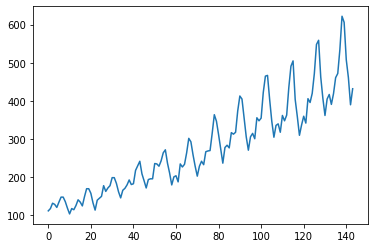

In [10]:
plt.plot(df['#Passengers'])

In [19]:
scaler = MinMaxScaler()
df= scaler.fit_transform(df[['#Passengers']])

In [141]:
dfTrain_size = int(len(df)*0.8)
dfTest_size = len(df) - dfTrain_size


In [142]:
dfTrain , dfTest = df[0:dfTrain_size, :] ,df[dfTrain_size: len(df), :]

In [143]:

def create_set(dataset , step_size):
    x_data = []
    y_data = []
    for i in range(0,len(dataset)-step_size-1):
        x = dataset[i:(i+step_size),0]
        y = dataset[i+step_size,0]
        x_data.append(x)
        y_data.append(y)
    return  x_data , y_data

In [144]:
step_size = 4
X_train, Y_train = create_set(dfTrain , step_size) 
X_test, y_test = create_set(dfTest , step_size)



In [145]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(y_test)


In [146]:
X_train = X_train.reshape(X_train.shape[0],4,1)
X_test = X_test.reshape(X_test.shape[0],4,1)


In [157]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(4,1)))
model.add(Dropout(0.3))
model.add(LSTM(50))
model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(metrics=['accuracy'],loss='mean_squared_error', optimizer='adam')
model.fit(X_train,Y_train , validation_data=(X_test,Y_test),epochs=100, batch_size=1, verbose=1)

Train on 110 samples, validate on 24 samples
Epoch 1/100
110/110 [==============================] - 2s 15ms/step - loss: 0.0199 - accuracy: 0.0091 - val_loss: 0.0629 - val_accuracy: 0.0000e+00
Epoch 2/100
110/110 [==============================] - 1s 6ms/step - loss: 0.0119 - accuracy: 0.0091 - val_loss: 0.0315 - val_accuracy: 0.0417
Epoch 3/100
110/110 [==============================] - 1s 6ms/step - loss: 0.0109 - accuracy: 0.0091 - val_loss: 0.0395 - val_accuracy: 0.0417
Epoch 4/100
110/110 [==============================] - 1s 6ms/step - loss: 0.0064 - accuracy: 0.0091 - val_loss: 0.0426 - val_accuracy: 0.0417
Epoch 5/100
110/110 [==============================] - 1s 6ms/step - loss: 0.0115 - accuracy: 0.0091 - val_loss: 0.0424 - val_accuracy: 0.0417
Epoch 6/100
110/110 [==============================] - 1s 6ms/step - loss: 0.0083 - accuracy: 0.0091 - val_loss: 0.0494 - val_accuracy: 0.0417
Epoch 7/100
110/110 [==============================] - 1s 6ms/step - loss: 0.0079 - accuracy

110/110 [==============================] - 1s 6ms/step - loss: 0.0038 - accuracy: 0.0091 - val_loss: 0.0073 - val_accuracy: 0.0417
Epoch 58/100
110/110 [==============================] - 1s 6ms/step - loss: 0.0036 - accuracy: 0.0091 - val_loss: 0.0082 - val_accuracy: 0.0417
Epoch 59/100
110/110 [==============================] - 1s 5ms/step - loss: 0.0028 - accuracy: 0.0091 - val_loss: 0.0130 - val_accuracy: 0.0417
Epoch 60/100
110/110 [==============================] - 1s 6ms/step - loss: 0.0036 - accuracy: 0.0091 - val_loss: 0.0099 - val_accuracy: 0.0417
Epoch 61/100
110/110 [==============================] - 1s 6ms/step - loss: 0.0039 - accuracy: 0.0091 - val_loss: 0.0065 - val_accuracy: 0.0417
Epoch 62/100
110/110 [==============================] - 1s 5ms/step - loss: 0.0035 - accuracy: 0.0091 - val_loss: 0.0133 - val_accuracy: 0.0417
Epoch 63/100
110/110 [==============================] - 1s 6ms/step - loss: 0.0032 - accuracy: 0.0091 - val_loss: 0.0130 - val_accuracy: 0.0417
Epoch

In [158]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

In [159]:
train_pred = scaler.inverse_transform(train_pred)
test_pred =  scaler.inverse_transform(test_pred)

In [160]:
math.sqrt(mean_squared_error(Y_train,train_pred))

249.7419100036089

In [161]:
math.sqrt(mean_squared_error(Y_test,test_pred))

400.1252586900716

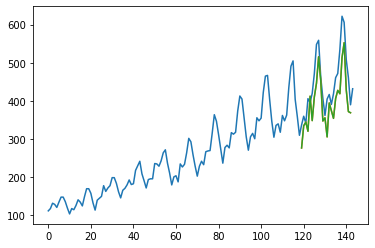

In [162]:
lookback = 4
trainpredictplot = np.empty_like(df)
trainpredictplot[:,:] = np.nan
trainpredictplot[lookback:len(train_pred)+lookback,:] = train_pred

testpredictplot = np.empty_like(df)
testpredictplot[:,:] = np.nan
testpredictplot[len(train_pred)+(2*lookback)+1 : len(df)-1,:] = test_pred

plt.plot(scaler.inverse_transform(df))
plt.plot(testpredictplot)
plt.plot(testpredictplot)
plt.show()

NameError: name 'plot_acf' is not defined